### HEART DISEASE PREDICTION USING MACHINE LEARNING ALGORITHMS

In [59]:
# Import the Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

DATASET
We used the HEART DISEASE DATASET (COMPREHENSIVE) from IEEE Dataport. The dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland

Hungarian

Switzerland

Long Beach VA

Statlog (Heart) Data Set.

The dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.

In [3]:
# Load the Dataset
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [4]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [5]:
# Examine the Dataset

df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
# Basic Statistics
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest pain type'}>],
       [<AxesSubplot:title={'center':'resting bp s'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>],
       [<AxesSubplot:title={'center':'resting ecg'}>,
        <AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ST slope'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

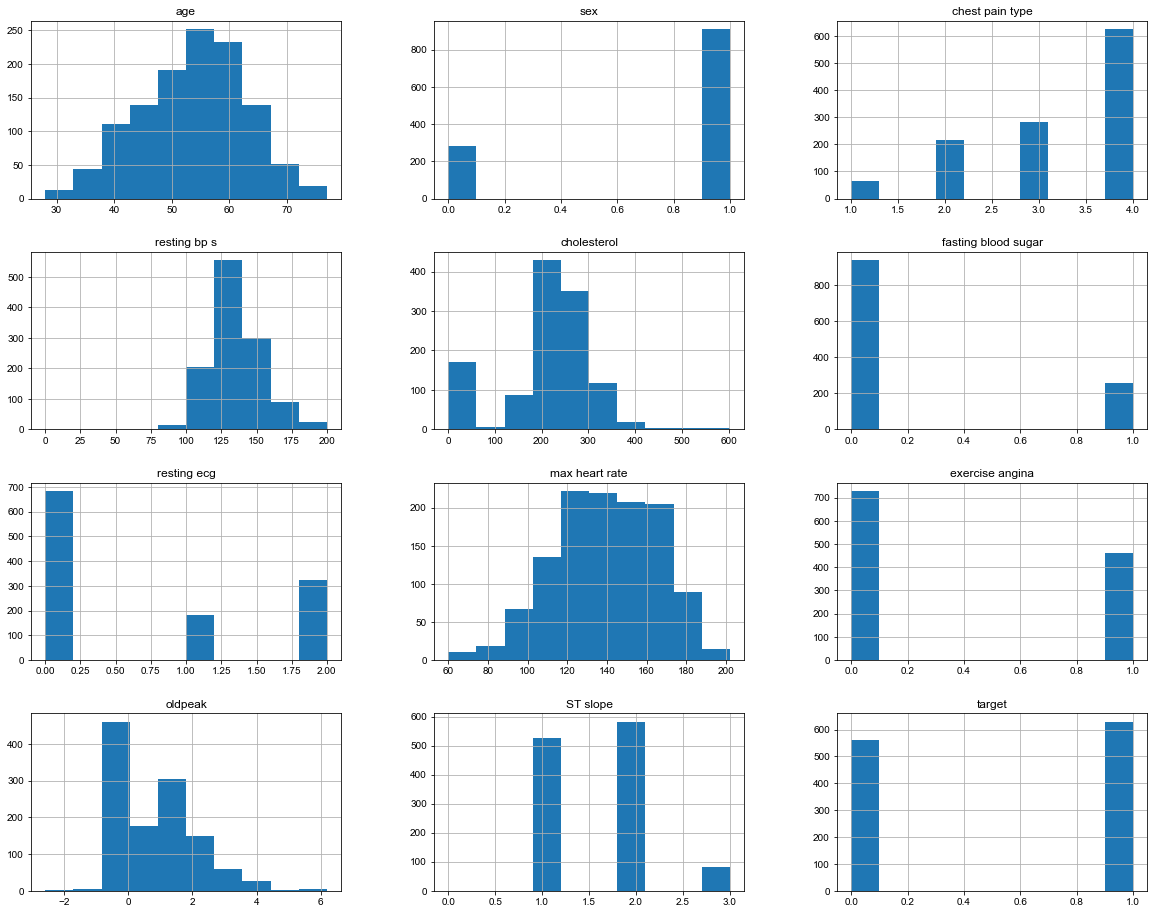

In [11]:
plt.rcParams['font.family'] = 'Arial'
df.hist(figsize = (20,16))

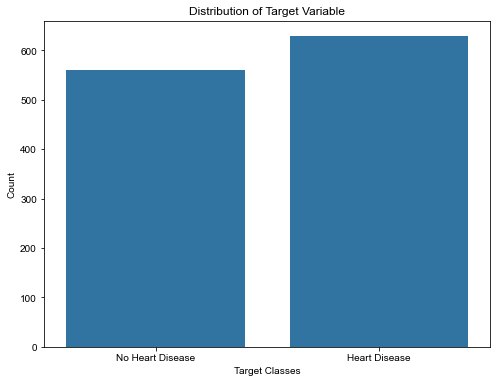

In [12]:
new_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

class_label_mapping = {0: "No Heart Disease", 1: "Heart Disease"}
new_data["target_class"] = new_data["target"].map(class_label_mapping)

plt.figure(figsize=(8, 6))

sns.countplot(x="target_class", data=new_data, order=["No Heart Disease", "Heart Disease"])

plt.title("Distribution of Target Variable")
plt.xlabel("Target Classes")
plt.ylabel("Count")

plt.show()

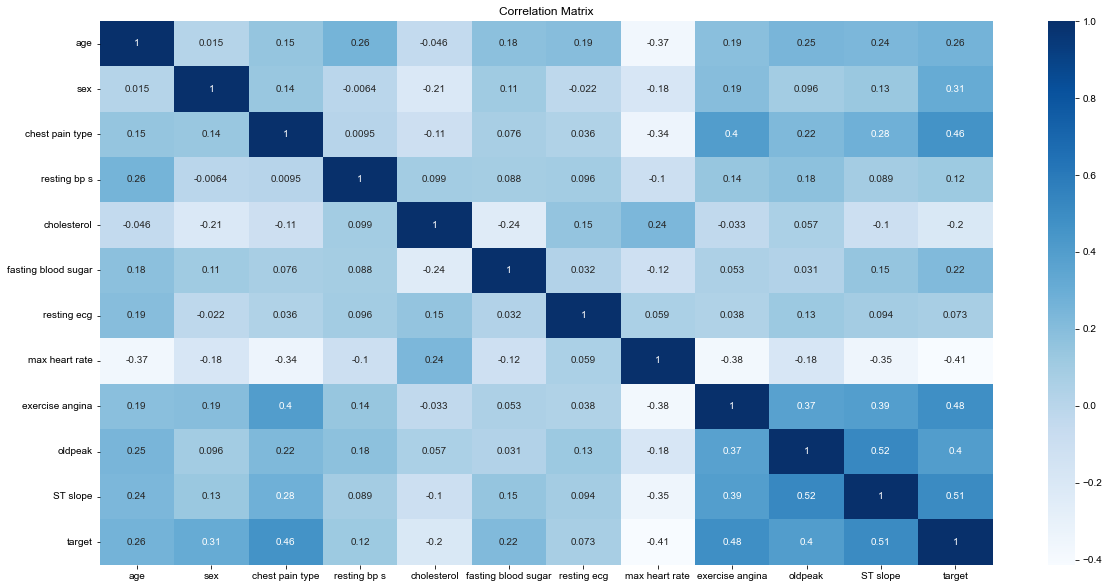

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Check for null Values

df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [15]:
# Check for Duplicated Values

df.duplicated().sum()

272

In [16]:
df['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

In [17]:
# Setting Target

X_normal = df.drop("target", axis=1)
Y = df["target"]

In [18]:
# Scalling the Data 
from sklearn.preprocessing import StandardScaler

In [19]:
Scaler = StandardScaler()

X = Scaler.fit_transform(X_normal)
X = pd.DataFrame(X, columns = X_normal.columns)

X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217


In [20]:
Y.value_counts()

1    629
0    561
Name: target, dtype: int64

In [21]:
# Train-Test-Split
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
# 80% of the data will be used for training
# 20% of the data will be used for testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

##### MODEL TRAINING AND EVALUATION

###### 1. LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# Define the Parameter grid for Logistic regression

logreg_param_grid = { "penalty" : ["l1", "l2"],
                      "C" : np.logspace(-3, 3, 7),
                      "solver" : ["liblinear"]}

In [25]:
# Create a Logistic Regression Model

logreg_model = LogisticRegression(random_state = 42)

In [26]:
# Perform grid search with cross-validation
logreg_grid_search = GridSearchCV( logreg_model, logreg_param_grid, cv=5, scoring="accuracy" )\

logreg_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [27]:
# Get the Best Parameter

best_logreg_params = logreg_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logreg_params)

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [28]:
# Train a Logistic Regression model with the best parameters

best_logreg_model = LogisticRegression(random_state=42, **best_logreg_params)
best_logreg_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [29]:
# Make predictions on the test set

logreg_predict = best_logreg_model.predict(X_test)

In [31]:
# Calculate accuracy on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_logreg_acc = accuracy_score(Y_test, logreg_predict)
print("Best Accuracy of Logistic Regression model:",
    "{:.2f}%".format(best_logreg_acc * 100))

Best Accuracy of Logistic Regression model: 85.29%


In [32]:
# Display classification report

print("\nClassification Report - Logistic Regression:")
lr_cr = classification_report(Y_test, logreg_predict)
print(lr_cr)


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.87      0.86      0.87       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [33]:
# Display confusion matrix

logreg_cm = confusion_matrix(Y_test, logreg_predict)

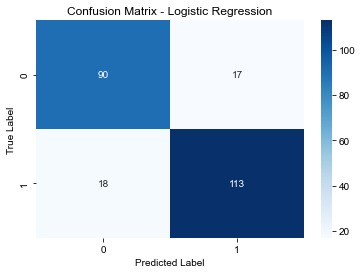

In [34]:
# Plot the confusion matrix

sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

###### 2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Define the parameter grid

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(1, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

In [37]:
# Create a Decision Tree model

DT = DecisionTreeClassifier(random_state=0)

In [38]:
# Perform grid search with cross-validation

grid_search = GridSearchCV(DT, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
# Get the best parameters

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [40]:
# Train a Decision Tree with the best parameters

best_DT = DecisionTreeClassifier(random_state=0, **best_params)
best_DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features='sqrt',
                       random_state=0)

In [41]:
# Make predictions on the test set

DT_predict = best_DT.predict(X_test)

In [42]:
# Calculate accuracy on the test set

max_dt_acc = accuracy_score(Y_test, DT_predict)
print("Accuracy of Decision Tree with Best Parameters:",
    "{:.2f}%".format(max_dt_acc * 100))

Accuracy of Decision Tree with Best Parameters: 86.97%


In [43]:
# Display classification report

print("Classification Report:")
dt_cr = classification_report(Y_test, DT_predict)
print(dt_cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.88      0.89      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



In [44]:
# Display confusion matrix

DT_cm = confusion_matrix(Y_test, DT_predict)

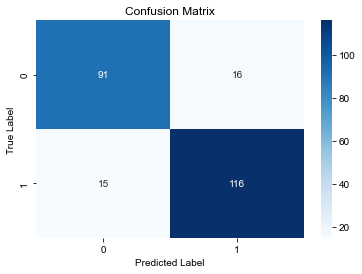

In [45]:
# Plot the confusion matrix

sns.heatmap(DT_cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [46]:
from sklearn.tree import plot_tree

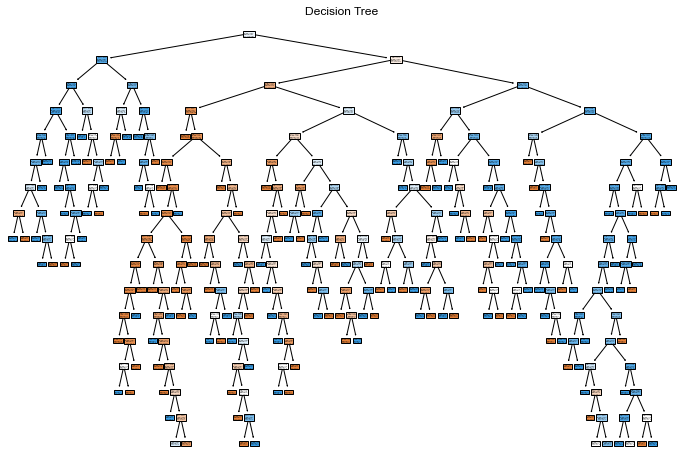

In [47]:
plt.figure(figsize=(12,8))
plot_tree(best_DT, filled = True)
plt.title("Decision Tree")
plt.show()

#### Comparison

##### 1. Comparison Table

In [48]:
# Create a dictionary to store the models and their accuracies

models_accuracy = {
    "Logistic Regression": best_logreg_acc,
    "Decision Tree": max_dt_acc
}

In [49]:
# Find the model with the highest accuracy

best_model = max(models_accuracy, key=models_accuracy.get)
best_accuracy = models_accuracy[best_model]

In [50]:
# Create a DataFrame for comparison

comparison = pd.DataFrame(
    {
        "Model": list(models_accuracy.keys()),
        "Accuracy": ["{:.2f}%".format(acc * 100) for acc in models_accuracy.values()],
    }
)

In [51]:
print("Comparison Table:")
print(comparison)

Comparison Table:
                 Model Accuracy
0  Logistic Regression   85.29%
1        Decision Tree   86.97%


In [52]:
# Print the name and accuracy of the best model

print("\nBest Model:")
print(f"{best_model}: {best_accuracy:.2%}")


Best Model:
Decision Tree: 86.97%


##### 2. Comparison Bar Plot

C:\Users\Priya\AppData\Local\Temp/ipykernel_15692/4029711008.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(models_accuracy.keys()), y=y_values, palette=colors)
C:\Users\Priya\AppData\Local\Temp/ipykernel_15692/4029711008.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


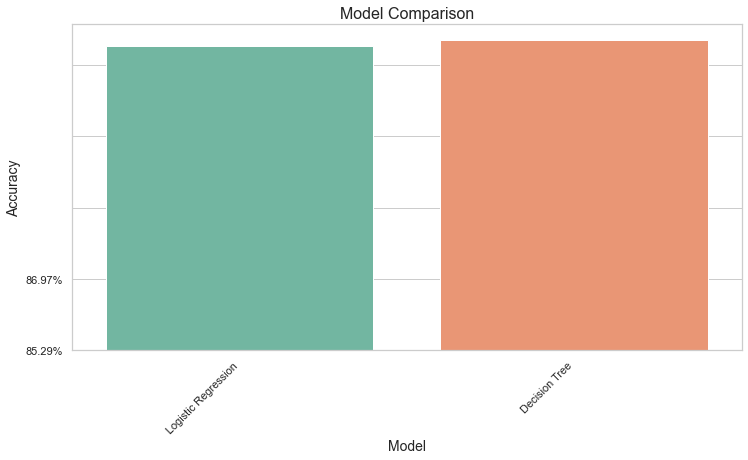

In [53]:
# Multiply values by 100 and format to 2 decimal places
y_values = [value * 100 for value in models_accuracy.values()]
y_labels = ["{:.2f}%".format(value) for value in y_values]

# Create a color palette with sufficient contrast
colors = sns.color_palette("Set2", len(models_accuracy))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=list(models_accuracy.keys()), y=y_values, palette=colors)

# Set y-axis labels
ax.set_yticklabels(y_labels)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.title("Model Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.show()

##### 3. All Confusion Matrieces 

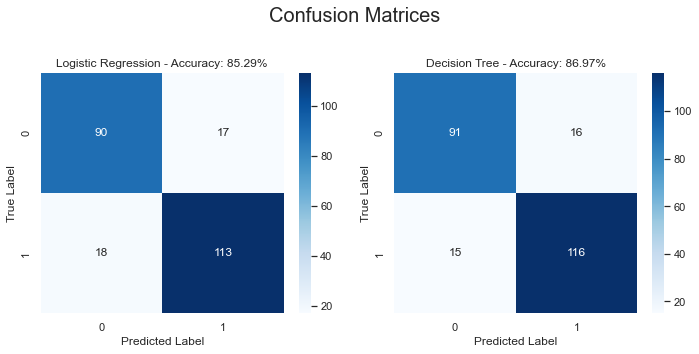

In [56]:
num_classifiers = 2
num_rows = (num_classifiers - 1) // 4 + 1
num_cols = min(num_classifiers, 2)

fig, axes = plt.subplots(
    nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows)
)
fig.suptitle("Confusion Matrices", fontsize=20)

classifiers = [
    ("Logistic Regression", logreg_cm, best_logreg_acc),
    ("Decision Tree", DT_cm, max_dt_acc),
]

for (name, cm, acc_score), ax in zip(classifiers, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

    ax.set_title(f"{name} - Accuracy: {acc_score * 100:.2f}%")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

for i in range(num_classifiers, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### 4. Classification Report and Bar Plot

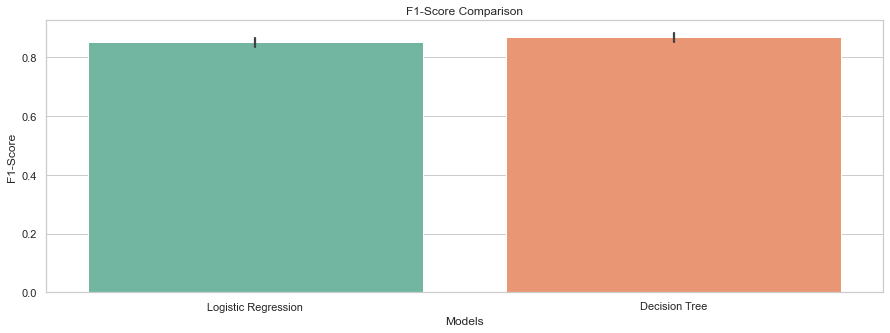

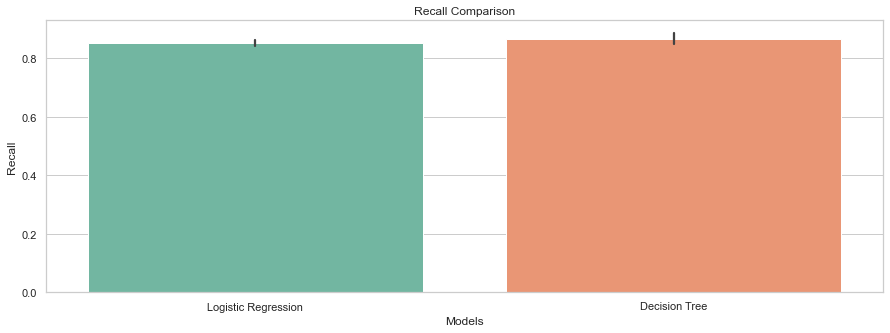

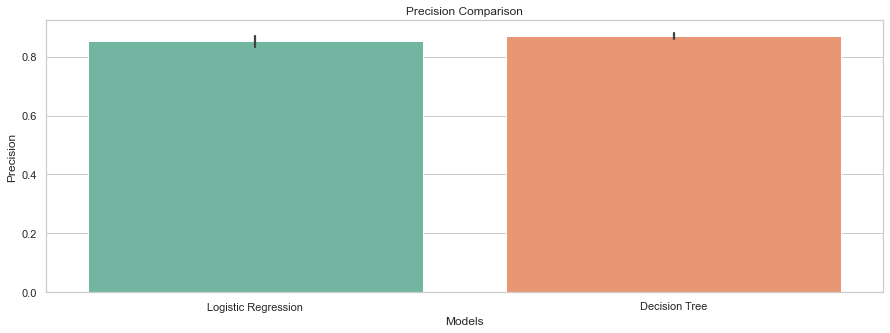

In [57]:
# Get Classification Reports as Dictionary

lr_cr = classification_report(Y_test, logreg_predict, output_dict=True)
dt_cr = classification_report(Y_test, DT_predict, output_dict=True)

classification_reports = [lr_cr, dt_cr]

f1_scores = {}
recall_scores = {}
precision_scores = {}

# Store f1-score, recall, and precision scores in lists

for name, cr in zip(
    [
        "Logistic Regression",
        "Decision Tree",
    ],
    classification_reports,
):
    f1_scores[name] = [
        cr[label]["f1-score"] for label in cr.keys() if label.isnumeric()
    ]
    recall_scores[name] = [
        cr[label]["recall"] for label in cr.keys() if label.isnumeric()
    ]
    precision_scores[name] = [
        cr[label]["precision"] for label in cr.keys() if label.isnumeric()
    ]

# Create pandas dataframes from the lists

df_f1 = pd.DataFrame(
    f1_scores, index=[str(i) for i in range(1, len(f1_scores["Decision Tree"]) + 1)]
)
df_recall = pd.DataFrame(
    recall_scores,
    index=[str(i) for i in range(1, len(recall_scores["Decision Tree"]) + 1)],
)
df_precision = pd.DataFrame(
    precision_scores,
    index=[str(i) for i in range(1, len(precision_scores["Decision Tree"]) + 1)],
)

# Plot accuracy comparison

plt.figure(figsize=(15, 5))
sns.barplot(data=df_f1, palette="Set2")
plt.title("F1-Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.show()

# Plot recall comparison

plt.figure(figsize=(15, 5))
sns.barplot(data=df_recall, palette="Set2")
plt.title("Recall Comparison")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.show()

# Plot precision comparison

plt.figure(figsize=(15, 5))
sns.barplot(data=df_precision, palette="Set2")
plt.title("Precision Comparison")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.show()